In [2]:
import jax
import jax.numpy as jnp
import jax.random as jrand

import matplotlib.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


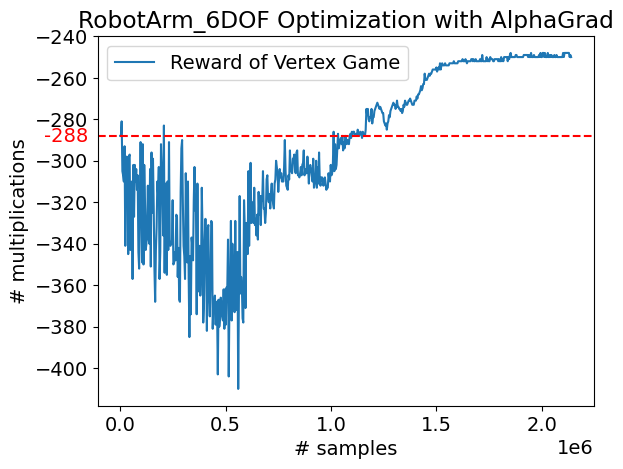

In [2]:
font = {"family" : "normal",
        "weight" : "normal",
        "size"   : 14}

plt.rc('font', **font)


data = np.genfromtxt("RobotArm_6DOF_A0_good_run.csv", delimiter=",", skip_header=1)
num_samples = data[:, 0]*32*108
num_muls = data[:, 1]

fig, ax = plt.subplots()
ax.plot(num_samples, num_muls, label="Reward of Vertex Game")
ax.axhline(y=-288., color='r', linestyle='--')
ax.set_xlabel("# samples")
ax.set_ylabel("# multiplications")
ax.set_title("RobotArm_6DOF Optimization with AlphaGrad")

trans = transforms.blended_transform_factory(
    ax.get_yticklabels()[0].get_transform(), ax.transData)
ax.text(0,-288., "{:.0f}".format(-288.), color="red", transform=trans, 
        ha="right", va="center")
ax.legend()

In [3]:
from graphax.perf import plot_performance
from graphax.examples import BlackScholes_Jacobian

In [4]:
# 302 mults
order = [69, 105, 77, 41, 31, 45, 26, 99, 95, 61, 18, 48, 35, 36, 25, 93, 73, 129, 53, 117, 10, 9, 87, 19, 46, 138, 130, 107, 70, 42, 47, 38, 40, 58, 13, 80, 90, 78, 32, 98, 97, 11, 24, 17, 68, 137, 83, 119, 7, 96, 122, 14, 128, 72, 124, 71, 5, 115, 59, 39, 49, 1, 102, 44, 75, 139, 120, 113, 51, 109, 6, 134, 131, 133, 101, 50, 34, 52, 20, 89, 29, 27, 79, 2, 56, 57, 108, 86, 127, 22, 82, 121, 30, 135, 85, 123, 15, 116, 62, 114, 112, 63, 12, 65, 67, 64, 100, 81, 110, 23, 88, 28, 60, 125, 33, 103, 111, 55, 126, 21, 43, 91, 76, 92, 94, 104, 74, 84, 106, 136, 66, 37, 16, 4, 54, 8, 118, 132, 3]

mM_order = [25, 34, 44, 45, 46, 47, 48, 49, 50, 51, 5, 6, 7, 8, 9, 14, 17, 19, 
            27, 28, 29, 30, 31, 36, 37, 38, 39, 40, 53, 57, 58, 67, 68, 70, 84, 
            90, 104, 106, 108, 110, 112, 114, 1, 10, 11, 20, 22, 23, 26, 32, 33, 
            35, 41, 42, 54, 55, 56, 60, 61, 62, 63, 65, 66, 72, 74, 76, 77, 80, 
            81, 82, 86, 88, 91, 94, 95, 97, 98, 101, 102, 13, 18, 64, 69, 78, 
            79, 85, 89, 99, 105, 4, 24, 43, 103, 83, 93, 2, 15, 87, 12, 52, 96, 
            21, 71, 100, 73, 59, 92, 3, 16, 75]

In [10]:
from graphax import jacve
shape = (512,)
key = jrand.PRNGKey(42)
xs = [.01, .02, .02, .01, .01]
xs = [jrand.uniform(key, shape)*x for x in xs]
xs = jax.device_put(xs, jax.devices("cpu")[0])
# BlackScholes_Jacobian(*xs)
grad_f = jax.jit(jacve(BlackScholes_Jacobian, order=order, argnums=(0, 1, 2, 3, 4)))
# grad_f(*xs)

69 : 65792
105 : 0
77 : 131072
41 : 0
31 : 0
45 : 512
26 : 0
99 : 0
95 : 131072
61 : 131072
18 : 512
48 : 0
35 : 0
36 : 0
25 : 0
93 : 0
73 : 196608
129 : 131072
53 : 0
117 : 393216
10 : 65792
9 : 65536
87 : 131072
19 : 0
46 : 0
138 : 0
130 : 0
107 : 0
70 : 65536
42 : 1
47 : 0
38 : 256
40 : 256
58 : 0
13 : 66048
80 : 65536
90 : 197376
78 : 1
32 : 1
98 : 262144
97 : 131072
11 : 512
24 : 131072
17 : 0
68 : 0
137 : 4294967296
83 : 524288
119 : 0
7 : 65792
96 : 0
122 : 262144
14 : 65536
128 : 8589934592
72 : 65536
124 : 21475164160
71 : 8589934592
5 : 0
115 : 0
59 : 65792
39 : 256
49 : 0
1 : 512
102 : 262144
44 : 512
75 : 65792
139 : 0
120 : 0
113 : 131072
51 : 0
109 : 524288
6 : 256
134 : 0
131 : 131584
133 : 196608
101 : 0
50 : 0
34 : 512
52 : 0
20 : 512
89 : 0
29 : 256
27 : 512
79 : 65792
2 : 512
56 : 131072
57 : 131072
108 : 0
86 : 0
127 : 0
22 : 256
82 : 327680
121 : 0
30 : 65536
135 : 12884901888
85 : 196608
123 : 33685504
15 : 525312
116 : 25770196992
62 : 131072
114 : 131072
112 : 0

IndexError: tuple index out of range

In [13]:
plot_performance(BlackScholes_Jacobian, xs, order, mM_order, "./BlackScholes.png", samplesize=1000, use_vmap=False)

69 : 65792
105 : 0
77 : 131072
41 : 0
31 : 0
45 : 512
26 : 0
99 : 0
95 : 131072
61 : 131072
18 : 512
48 : 0
35 : 0
36 : 0
25 : 0
93 : 0
73 : 196608
129 : 131072
53 : 0
117 : 393216
10 : 65792
9 : 65536
87 : 131072
19 : 0
46 : 0
138 : 0
130 : 0
107 : 0
70 : 65536
42 : 1
47 : 0
38 : 256
40 : 256
58 : 0
13 : 66048
80 : 65536
90 : 197376
78 : 1
32 : 1
98 : 262144
97 : 131072
11 : 512
24 : 131072
17 : 0
68 : 0
137 : 4294967296
83 : 524288
119 : 0
7 : 65792
96 : 0
122 : 262144
14 : 65536
128 : 8589934592
72 : 65536
124 : 21475164160
71 : 8589934592
5 : 0
115 : 0
59 : 65792
39 : 256
49 : 0
1 : 512
102 : 262144
44 : 512
75 : 65792
139 : 0
120 : 0
113 : 131072
51 : 0
109 : 524288
6 : 256
134 : 0
131 : 131584
133 : 196608
101 : 0
50 : 0
34 : 512
52 : 0
20 : 512
89 : 0
29 : 256
27 : 512
79 : 65792
2 : 512
56 : 131072
57 : 131072
108 : 0
86 : 0
127 : 0
22 : 256
82 : 327680
121 : 0
30 : 65536
135 : 12884901888
85 : 196608
123 : 33685504
15 : 525312
116 : 25770196992
62 : 131072
114 : 131072
112 : 0

IndexError: tuple index out of range

### The best result yet
fwd mean: 0.13376061618328094, rev mean: 0.12299295514822006, mM mean: 0.12740099430084229, cc mean: 0.1195559874176979
fwd err: [-0.0022094   0.00508478], rev err: [-0.00505075  0.00332312], mM err: [-0.00290978  0.00470254], cc err: [-0.00524038  0.00420592]

fwd mean: 11.58597469329834, rev mean: 11.101419448852539, mM_mean: 10.998786926269531, cc_mean: 10.468031883239746, 
fwd std: 0.5178468823432922, rev std: 1.0373451709747314, mM_std: 1.0301194190979004, cc_std: 0.8663851618766785

fwd mean: 11.926535606384277, rev mean: 11.291781425476074, mM_mean: 11.579188346862793, cc_mean: 10.853036880493164, 
fwd std: 0.5759796500205994, rev std: 0.9990830421447754, mM_std: 0.8783360719680786, cc_std: 1.3300716876983643

fwd mean: 11.498019218444824, rev mean: 10.715002059936523, mM_mean: 10.045455932617188, cc_mean: 9.468513488769531, 
fwd std: 0.43519699573516846, rev std: 0.7234329581260681, mM_std: 0.27425265312194824, cc_std: 0.502721905708313

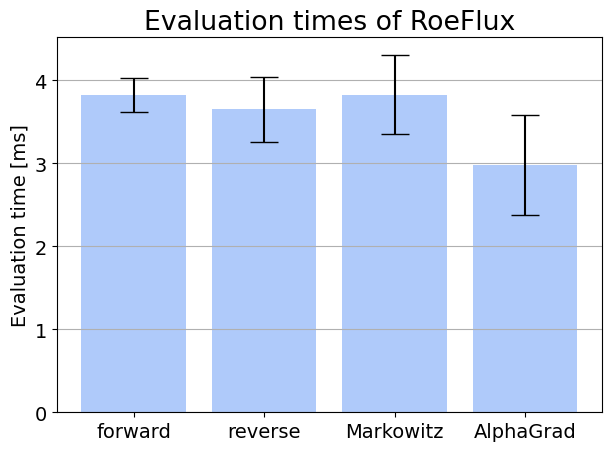

In [33]:
# Order: fwd, rev, mM, cc
means = jnp.array([3.8236873149871826, 3.6495230197906494, 3.825319290161133, 2.9825470447540283])
stds = jnp.array([0.2087354212999344, 0.39476415514945984, 0.47684094309806824, 0.6004145741462708])
x_pos = jnp.arange(len(means))
modes = ["forward", "reverse", "Markowitz", "AlphaGrad"]


fig, ax = plt.subplots()
ax.bar(x_pos, means, yerr=stds, align="center", alpha=0.5, 
            ecolor="black", color="#6096f6", capsize=10)
    
ax.set_ylabel("Evaluation time [ms]", fontsize=14)
ax.set_xticks(x_pos)
ax.set_xticklabels(modes, fontsize=14)
ax.tick_params(axis="y", labelsize=14)
ax.set_title(f"Evaluation times of RoeFlux")
ax.yaxis.grid(True)  
# ax.set_ylim((0.025, 0.04))

plt.tight_layout()